# Decision Tree

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/car_insurance_fraud.csv')
df.head()

,age,is_male,engine_size,months_last_claim,fraud
0,71,0,120,24,1
1,40,0,70,12,1
2,78,0,200,12,0
3,31,1,120,6,1
4,32,1,120,12,0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age', 
                                                        'is_male', 
                                                        'engine_size', 
                                                        'months_last_claim']],
                                                    df['fraud'] ,test_size=0.2)
X_train.head(3)

,age,is_male,engine_size,months_last_claim
16,82,0,70,12
36,44,1,70,6
99,51,0,200,24


In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)
train_accuracy= tree.score(X_train,y_train)*100
train_accuracy

72.5

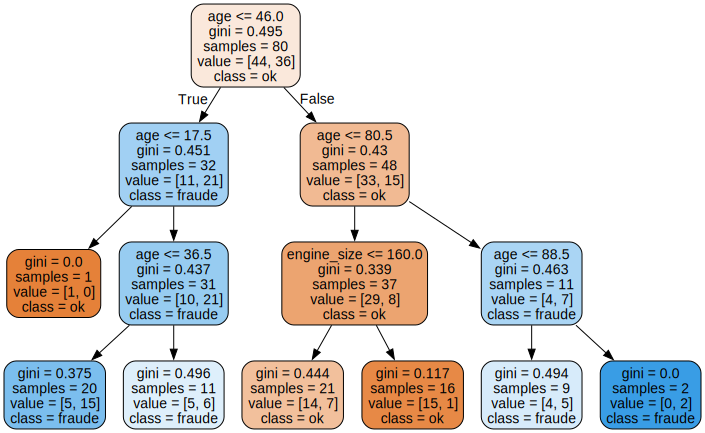

In [14]:
from sklearn.tree import export_graphviz
from graphviz import Source

dot_data = export_graphviz(tree, out_file=None,
                           filled=True, rounded=True,
                           feature_names=['age','is_male','engine_size','months_last_claim'],
                           class_names=['ok', 'fraude'])

grafico = Source(dot_data)
grafico

In [24]:
from sklearn.metrics import accuracy_score

for k in range(2,20,1):
  arv = DecisionTreeClassifier(max_depth = k )
  arv.fit(X_train , y_train)
  acc_treino = arv.score(X_train , y_train)
  preds = arv.predict(X_test)
  acc_teste = accuracy_score(y_test, preds)
  print(k, acc_treino*100, acc_teste*100)
 

2 72.5 55.00000000000001
3 72.5 55.00000000000001
4 76.25 45.0
5 85.0 55.00000000000001
6 92.5 55.00000000000001
7 96.25 55.00000000000001
8 98.75 55.00000000000001
9 98.75 45.0
10 98.75 50.0
11 98.75 45.0
12 98.75 45.0
13 98.75 50.0
14 98.75 55.00000000000001
15 98.75 55.00000000000001
16 98.75 50.0
17 98.75 60.0
18 98.75 50.0
19 98.75 55.00000000000001


# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=2)
rf.fit(X_train, y_train)
acc_treino = rf.score(X_train, y_train)
print(acc_treino)

0.7125


In [27]:
preds = rf.predict(X_test)
acc_teste = accuracy_score(y_test, preds)
print(acc_teste)

0.6


In [41]:
for k in range(1,20,1):
    rf = RandomForestClassifier(n_estimators=k)
    rf.fit(X_train, y_train)
    acc_treino = round(rf.score(X_train, y_train) * 100, 2)
    preds = rf.predict(X_test)
    acc_teste = round(accuracy_score(y_test, preds) * 100, 2)
    print(k, acc_treino, acc_teste)

1 81.25 60.0
2 83.75 60.0
3 90.0 65.0
4 91.25 70.0
5 92.5 70.0
6 91.25 65.0
7 93.75 65.0
8 95.0 60.0
9 95.0 70.0
10 97.5 70.0
11 96.25 65.0
12 97.5 65.0
13 97.5 65.0
14 95.0 55.0
15 98.75 55.0
16 97.5 65.0
17 97.5 65.0
18 98.75 70.0
19 97.5 60.0


# Atividade individual

In [54]:
treino = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/RiscoCredito%20-%20okk.csv')
treino.head(100)

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.4
1,0,2,7,9,2.6
2,0,1,7,9,5.8
3,0,1,7,9,4.7
4,0,1,7,9,3.9
...,...,...,...,...,...
95,1,1,4,1,2.9
96,1,1,4,1,1.4
97,0,2,7,8,2.6
98,0,1,7,8,5.8


In [43]:
teste = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/RiscoCredito%20-%20prever2.csv')
teste.head()

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.4
1,0,2,7,9,2.6
2,0,1,7,9,5.8
3,0,1,7,9,4.7
4,0,1,7,9,3.9


In [57]:
teste.groupby('Profissao').agg({'Inadimplente': 'sum'})

,Inadimplente
Profissao,
1,1
3,1
8,0
9,0


In [58]:
alvo = 'Inadimplente'
variavel = ['Genero', 'GrauEscolaridade', 'Renda']

X_train = treino[variavel]
y_train = treino[alvo]

X_test = teste[variavel]
y_test = teste[alvo]

In [59]:
from sklearn.metrics import accuracy_score

for k in range(2,20,1):
  tree = DecisionTreeClassifier(max_depth = k)
  tree.fit(X_train , y_train)
  acc_treino = tree.score(X_train , y_train)
  preds = tree.predict(X_test)
  acc_teste = accuracy_score(y_test, preds)
  print(k, acc_treino*100, acc_teste*100)

2 97.0 87.5
3 100.0 100.0
4 100.0 100.0
5 100.0 100.0
6 100.0 100.0
7 100.0 100.0
8 100.0 100.0
9 100.0 100.0
10 100.0 100.0
11 100.0 100.0
12 100.0 100.0
13 100.0 100.0
14 100.0 100.0
15 100.0 100.0
16 100.0 100.0
17 100.0 100.0
18 100.0 100.0
19 100.0 100.0


In [60]:
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(X_train , y_train)
acc_treino = tree.score(X_train , y_train)
preds = tree.predict(X_test)
acc_teste = accuracy_score(y_test, preds)
print(acc_treino*100, acc_teste*100)

97.0 87.5


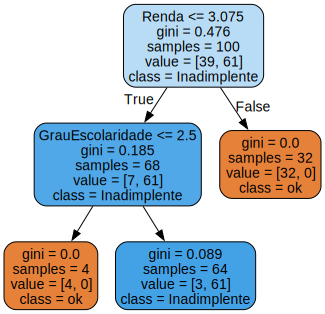

In [61]:
from sklearn.tree import export_graphviz
from graphviz import Source

dot_data = export_graphviz(tree, out_file=None,
                           filled=True, rounded=True,
                           feature_names=variavel,
                           class_names=['ok', 'Inadimplente'])

grafico = Source(dot_data)
grafico

In [62]:
tree.feature_importances_

array([0.        , 0.16339869, 0.83660131])

<Axes: >

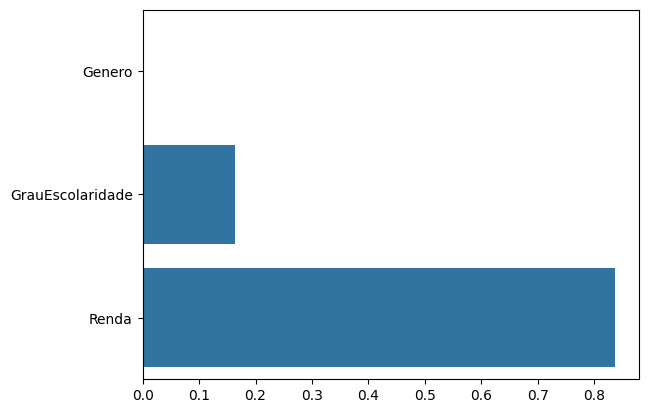

In [64]:
import seaborn as sns
sns.barplot(x=tree.feature_importances_, y=variavel)